In [63]:
%pip install -r requirements.txt
import pandas as pd
import numpy as np
import xgboost as xgb
import os
import tarfile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [78]:
def unarchive_and_read_tsv(prefix, tsv_filename):
    folder_path = "data_small"

    file_to_unarchive = None
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tar.gz') and file_name.startswith(prefix):
            file_to_unarchive = os.path.join(folder_path, file_name)
            break

    if file_to_unarchive is None:
        print(f"No matching .tar.gz file found with prefix '{prefix}'.")
        return None

    archive_name = os.path.basename(file_to_unarchive)[:-7]
    unarchived_folder = os.path.join(folder_path, archive_name)
    if os.path.exists(unarchived_folder):
        print("File already unarchived.")
    else:
        with tarfile.open(file_to_unarchive, 'r:gz') as tar:
            tar.extractall(unarchived_folder)
        print("File unarchived successfully.")

    tsv_file = os.path.join(unarchived_folder, tsv_filename)
    dataframe = pd.read_csv(tsv_file, delimiter='\t')
    return dataframe


In [80]:
prefix = "clinical"
tsv_filename = "clinical.tsv"

clinical_df = unarchive_and_read_tsv(prefix, tsv_filename)

# Remove duplicate rows based on 'case_id' column
print(f'Shape before deduplication: {clinical_df.shape}')
clinical_df = clinical_df.drop_duplicates(subset='case_id', keep='first')
print(f'Shape after deduplication: {clinical_df.shape}')

if clinical_df is not None:
    print(clinical_df.head())

File already unarchived.
(80, 158)
                                case_id case_submitter_id project_id   
0  0078b0c4-68a9-483b-9aab-61156d263213      TCGA-14-1034   TCGA-GBM  \
2  054f472f-98cb-4559-b2e2-b5f800fc8eef      TCGA-06-0221   TCGA-GBM   
4  153c2442-ea61-4b5e-8c5c-c71d287c6055      TCGA-28-5209   TCGA-GBM   
6  1e80ccf6-ef81-4662-bf5e-392f092c1e67      TCGA-41-2572   TCGA-GBM   
8  1f48f010-98fe-4b5a-b96a-14fb25eff23f      TCGA-06-0184   TCGA-GBM   

   age_at_index age_is_obfuscated cause_of_death cause_of_death_source   
0            60               '--            '--                   '--  \
2            31               '--            '--                   '--   
4            66               '--            '--                   '--   
6            67               '--            '--                   '--   
8            63               '--            '--                   '--   

  country_of_residence_at_enrollment  days_to_birth days_to_death  ...   
0            

(array([ 4.,  0.,  8.,  4., 12., 16., 14., 12.,  4.,  6.]),
 array([30. , 35.5, 41. , 46.5, 52. , 57.5, 63. , 68.5, 74. , 79.5, 85. ]),
 <BarContainer object of 10 artists>)

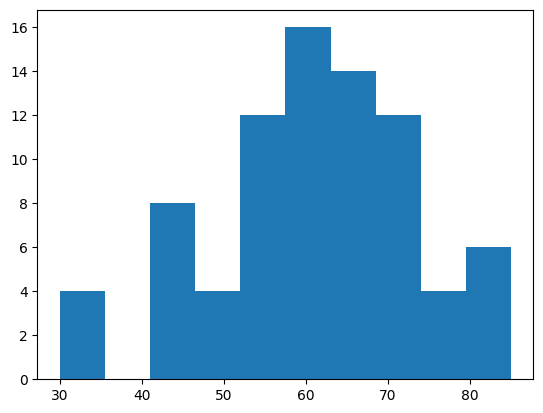

In [66]:
# extarcting the age column
age = clinical_df['age_at_index']
plt.hist(age, bins=10)

In [67]:
def parse_tsv_file(file_path):
    dataframe = pd.read_csv(file_path, delimiter='\t', comment='#')
    dataframe = dataframe[dataframe['gene_id'].str.startswith('ENSG')]
    dataframe = dataframe[['gene_id', 'tpm_unstranded']]
    dataframe = dataframe.set_index('gene_id').T
    return dataframe

In [75]:
def unarchive_and_build_dataframe(prefix):
    folder_path = "data_small"

    file_to_unarchive = None
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tar.gz') and file_name.startswith(prefix):
            file_to_unarchive = os.path.join(folder_path, file_name)
            break

    if file_to_unarchive is None:
        print(f"No matching .tar.gz file found with prefix '{prefix}'.")
        return None

    archive_name = os.path.basename(file_to_unarchive)[:-7]
    unarchived_folder = os.path.join(folder_path, archive_name)
    if os.path.exists(unarchived_folder):
        print("File already unarchived.")
    else:
        with tarfile.open(file_to_unarchive, 'r:gz') as tar:
            tar.extractall(unarchived_folder)
        print("File unarchived successfully.")

    dataframes = []
    for folder_name in os.listdir(unarchived_folder):
        folder_path = os.path.join(unarchived_folder, folder_name)
        if not os.path.isdir(folder_path):
            continue
        tsv_files = [f for f in os.listdir(folder_path) if f.endswith('.tsv')]
        if len(tsv_files) == 1:
            tsv_file = os.path.join(folder_path, tsv_files[0])
            dataframe = parse_tsv_file(tsv_file)
            dataframes.append(dataframe)

    if not dataframes:
        print("No .tsv files found.")
        return None

    combined_dataframe = pd.concat(dataframes, ignore_index=True)
    return combined_dataframe


In [77]:
prefix = "gdc_download"
data = None
data = unarchive_and_build_dataframe(prefix)

print(data)

File already unarchived.
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
(1, 60660)
gene_id  ENSG00000000003.15  ENSG00000000005.6  ENSG00000000419.13   
0                   69.5439             0.4599            112.2372  \
1                   44.1409             0.5011             77.8868   
2                   81.7969             0.1334             80.0162   
3                  178.1864             0.3367             71.0517   
4                   96.0510             0.3029             68.5263   
5                   76.9722           212.6327             85.4885   
6                   65.4239             0.189

In [70]:
data

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
0,69.5439,0.4599,112.2372,8.4532,8.4303,19.1823,7.8015,62.8843,19.1064,31.7049,...,0.0,3.2324,1.0380,0.0,0.0000,0.0000,10.7866,0.0,0.0202,2.9438
1,44.1409,0.5011,77.8868,4.8894,4.2000,30.4433,25.3965,52.9444,13.4404,18.1856,...,0.0,0.0000,0.5321,0.0,0.0000,0.0000,6.6311,0.0,0.0231,1.7611
2,81.7969,0.1334,80.0162,4.8043,2.8904,26.2095,12.3576,57.4271,12.6304,19.3338,...,0.0,0.0000,0.9901,0.0,0.0000,0.0000,7.5160,0.0,0.0409,1.7184
3,178.1864,0.3367,71.0517,4.1566,2.2713,8.3336,38.9304,37.4083,10.7585,19.9138,...,0.0,0.0000,0.5232,0.0,0.0000,0.0000,8.5254,0.0,0.0221,1.5635
4,96.0510,0.3029,68.5263,3.0529,3.5947,18.5736,12.6479,108.6826,22.7616,23.0231,...,0.0,0.0000,0.1569,0.0,0.0000,0.0000,10.6391,0.0,0.0000,1.9294
5,76.9722,212.6327,85.4885,8.0810,4.7098,17.7154,361.2061,65.8965,6.6777,46.7500,...,0.0,0.0000,0.2305,0.0,0.0000,0.0000,13.3304,0.0,0.0546,0.9906
6,65.4239,0.1890,74.3497,6.2505,6.1436,15.5249,4.1592,35.9265,20.5187,30.7931,...,0.0,0.0000,0.8565,0.0,0.0000,0.0175,8.9138,0.0,0.0072,3.3204
7,81.2876,0.1187,72.6344,6.1586,6.8217,10.7471,5.0596,50.8361,15.6912,34.6560,...,0.0,0.0000,0.4303,0.0,0.0000,0.0000,8.3365,0.0,0.0000,1.9810
8,40.8302,0.2112,68.6202,5.7166,2.7408,27.5078,50.3817,33.2978,10.7589,13.4732,...,0.0,0.0000,1.1484,0.0,0.0000,0.0000,10.6072,0.0,0.0648,3.1074
9,90.9708,0.4192,67.9240,4.0992,2.8605,23.1985,5.6137,45.6936,13.0025,13.8005,...,0.0,0.0000,0.3366,0.0,0.0000,0.0000,5.9581,0.0,0.0515,1.5100


In [71]:
def train_xgboost_model(data, clinical_df):
    # Ignore the first column "gene_id"
    features = data.iloc[:, 1:]
    target = clinical_df['age_at_index']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train an XGBoost regression model
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    return model

In [74]:
print(data.shape)
print(clinical_df.shape)
model = train_xgboost_model(data, clinical_df)

(40, 60660)
(80, 158)


ValueError: Found input variables with inconsistent numbers of samples: [40, 80]